In [1]:
import dask.dataframe as dd
import pandas as pd
import numpy as np
import collections
import pickle
from matplotlib.dates import date2num
import matplotlib.pyplot as plt
from datetime import datetime

In [2]:
path = "E:/yelp/{}.csv"

In [3]:
reviews = dd.read_csv(path.format("review"), header=0, sep="\t")

In [4]:
reviews['date'] = dd.to_datetime(reviews['date'], format='%Y-%m-%d')

In [5]:
reviews.head()

,review_id,user_id,business_id,stars,date,text,useful,funny,cool
0,VfBHSwC5Vz_pbFluy07i9Q,cjpdDjZyprfyDG3RlkVG3w,uYHaNptLzDLoV_JZ_MuzUA,5,2016-07-12,My girlfriend and I stayed here for 3 nights a...,0,0,0
1,3zRpneRKDsOPq92tq7ybAA,bjTcT8Ty4cJZhEOEo01FGA,uYHaNptLzDLoV_JZ_MuzUA,3,2016-10-02,If you need an inexpensive place to stay for a...,0,0,0
2,ne5WhI1jUFOcRn-b-gAzHA,AXgRULmWcME7J6Ix3I--ww,uYHaNptLzDLoV_JZ_MuzUA,3,2015-09-17,Mittlerweile gibt es in Edinburgh zwei Ableger...,0,0,0
3,llmdwOgDReucVoWEry61Lw,oU2SSOmsp_A8JYI7Z2JJ5w,uYHaNptLzDLoV_JZ_MuzUA,4,2016-08-21,Location is everything and this hotel has it! ...,0,0,0
4,DuffS87NaSMDmIfluvT83g,0xtbPEna2Kei11vsU-U2Mw,uYHaNptLzDLoV_JZ_MuzUA,5,2013-11-20,gute lage im stadtzentrum. shoppingmeile und s...,0,0,0


In [6]:
reviews.dtypes

review_id              object
user_id                object
business_id            object
stars                   int64
date           datetime64[ns]
text                   object
useful                  int64
funny                   int64
cool                    int64
dtype: object

In [7]:
businesses = dd.read_csv(path.format("business"), header=0, sep="\t")

In [35]:
def plot_city_stats(times, other_axis, city, stats):
    plt.figure(figsize=(20,10))
    plt.plot_date(times, other_axis)
    #plt.xlim(datetime(year=2008, month=5, day=1), datetime(year=2009, month=12, day=31))
    #plt.ylim(0, 80)
    #plt.title("{} for {}".format(stats, city))
    #plt.plot(times, np.poly1d(np.polyfit(times, other_axis, 1)))
    plt.show()

In [9]:
def parseAndPlotCity(city):
    city = pd.read_pickle("E:/yelp/Cities/{}.pkl".format(city))
    
    city_sorted_dates = city.sort_values('date')
    city_dates = city_sorted_dates['date'].unique()
    plottable_dates = date2num([datetime.strptime(i, '%Y-%m-%d') for i in city_dates])
    
    city_sorted_averages = city_sorted_dates.groupby(['date'], as_index=False).mean()
    city_sorted_counts = city_sorted_dates.groupby(['date'], as_index=False).count()
    
    city_review_counts = city_sorted_counts['review_id']
    city_review_averages = city_sorted_averages['stars']
    
    plot_city_stats(plottable_dates, city_review_counts, city, "Number of reviews")
    plot_city_stats(plottable_dates, city_review_averages, city, "Average stars rating")

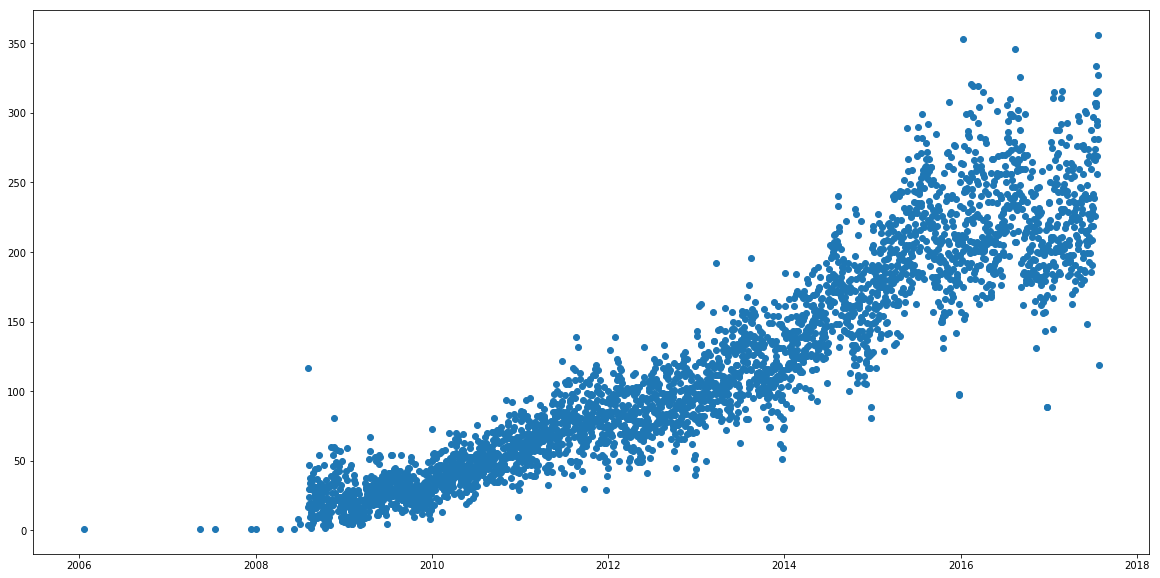

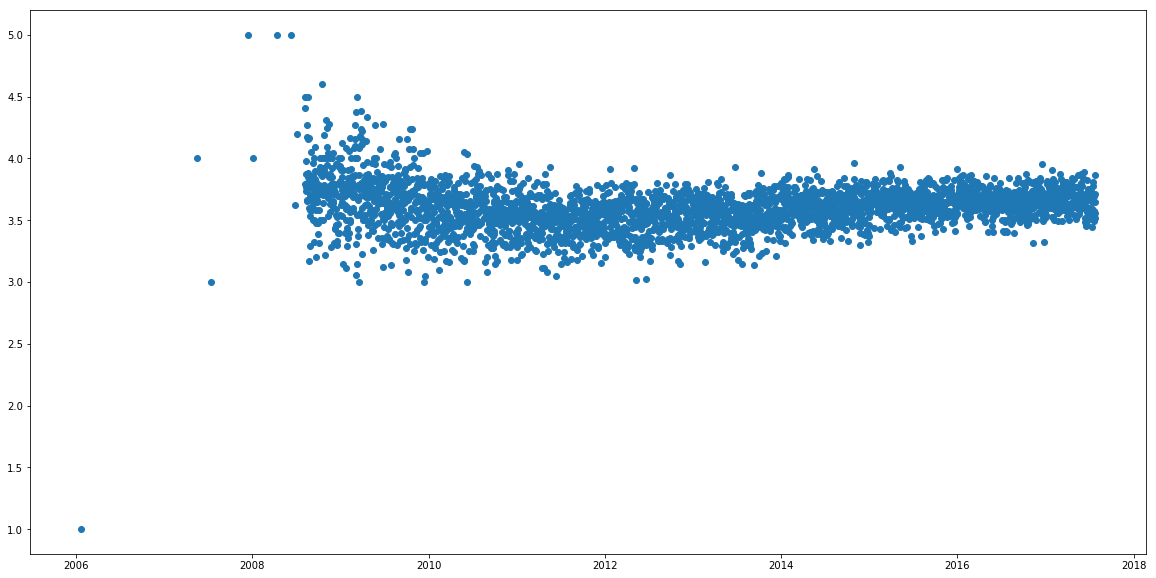

In [36]:
parseAndPlotCity("Toronto_ON")

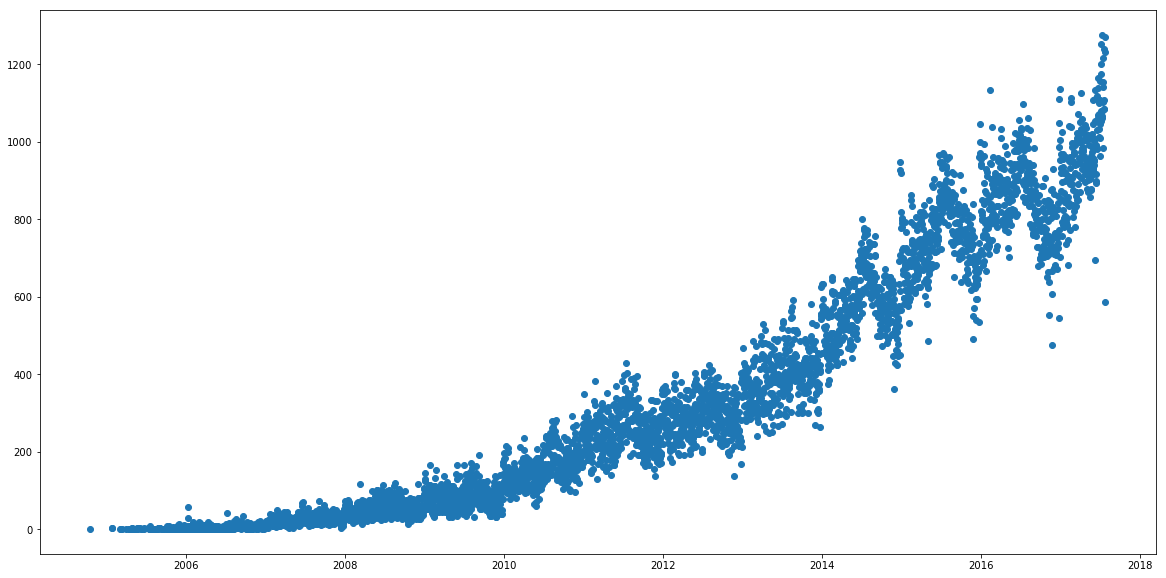

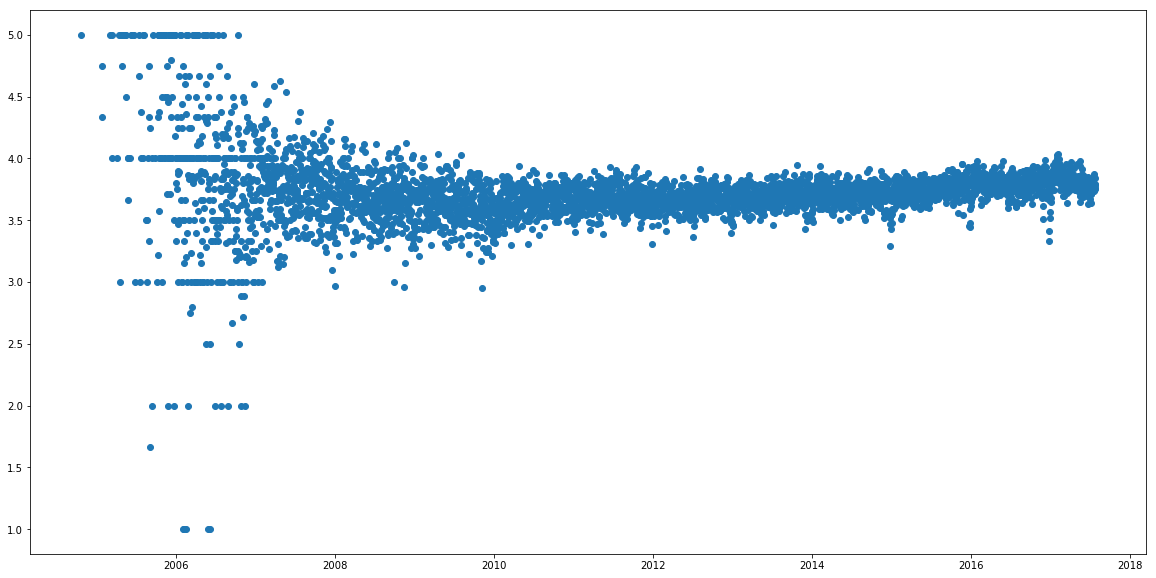

In [37]:
parseAndPlotCity("Las Vegas_NV")

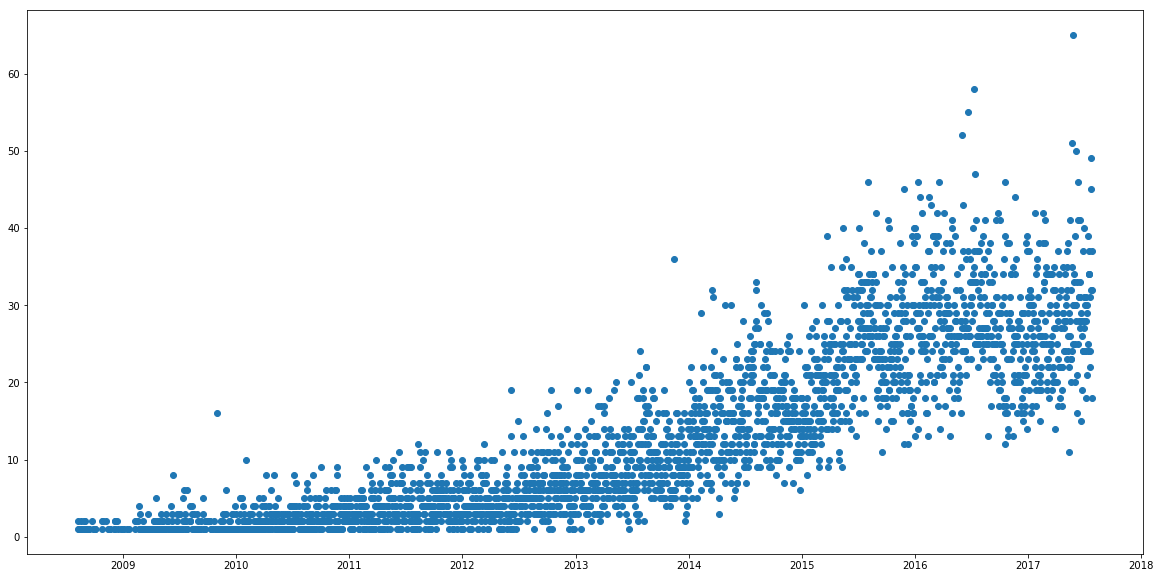

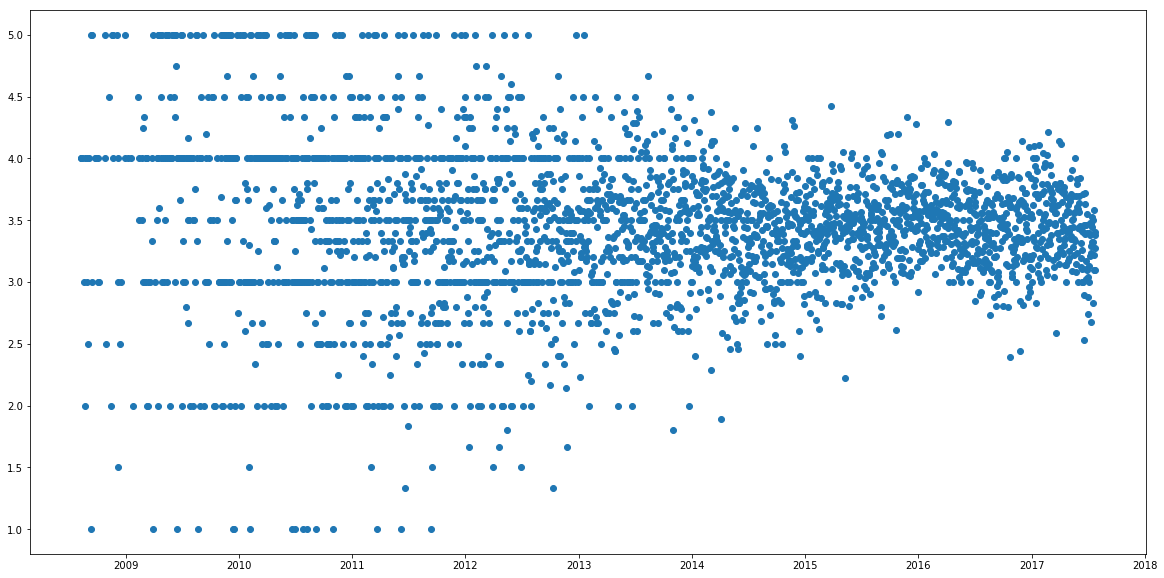

In [38]:
parseAndPlotCity("Mississauga_ON")

We should normalize the results based on the total number of reviews total per date. Then, we can compare these charts to ones of other cities and see if there are differences (or similarities). The total number of cities in the database is much smaller  than expected, and there is some noise to have to deal with, but once that has been done it should be easy to simply compare them.

Finally, we need to compare the frequencies of visitors to low-end vs high-end businesses across time (also normalized as necessary) to see the impact of the economy on our habits. We can also count up the number of reviews with mentions of certain terms, normalized across the total number of reviews.

In [13]:
cities = pickle.load(open("E:/yelp/cities_and_businesses.pkl", "rb"))
sorted(cities.keys())

['110 Las Vegas_NV',
 'AGINCOURT_ON',
 'Aberdour_FIF',
 'Aberlady_ELN',
 'Ahwahtukee_AZ',
 'Ahwatukee Foothills Village_AZ',
 'Ahwatukee_AZ',
 'Aichwald_BW',
 'Ajax_ON',
 'Alburg_VT',
 'Allegheny_PA',
 'Allison Park_PA',
 'Ambridge_PA',
 'Amherst_OH',
 'Anjou_QC',
 'Ansnorveldt_ON',
 'Anthem_AZ',
 'Arlington_WI',
 'Arnold_PA',
 'Arrowhead_AZ',
 'Ashburn_ON',
 'Aspinwall_PA',
 'Auburn Township_OH',
 'Auburn Twp_OH',
 'Aurora_OH',
 'Aurora_ON',
 'Avalon_PA',
 'Avon Lake_OH',
 'Avon_OH',
 'Avondale_AZ',
 "Baie-D'urfe_QC",
 "Baie-d'Urfé_QC",
 'Bainbridge Township_OH',
 'Bainbridge_OH',
 'Baldwin_PA',
 'Balerno_MLN',
 'Ballantyne_NC',
 'Banksville_PA',
 'Bath_OH',
 'Bathurst Quay_ON',
 'Bay Village_OH',
 'Beachwood_OH',
 'Beaconsfield_QC',
 'Beauharnois_QC',
 'Bedford HTS_OH',
 'Bedford Heights_OH',
 'Bedford Hts._OH',
 'Bedford_OH',
 'Beeton_ON',
 'Belleville_WI',
 'Bellevue_PA',
 'Bellvue_PA',
 'Belmont_NC',
 'Beloeil_QC',
 'Ben Avon_PA',
 'Bentleyville_OH',
 'Berea_OH',
 'Berg_BW',
 'Ber

In [14]:
user_counts = pd.read_pickle("E:/yelp/usercounts.pkl")

In [15]:
user_counts.tail()

,yelping_since,user_id,review_count
4553,2017-07-22,347,347
4554,2017-07-23,368,368
4555,2017-07-24,490,490
4556,2017-07-25,492,492
4557,2017-07-26,168,168
